Reference: https://www.pyimagesearch.com/2016/02/01/opencv-center-of-contour/

Let's see if this can be used to find the center of a superpixel.

(8, 11)


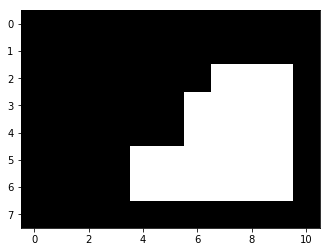

(7, 4)


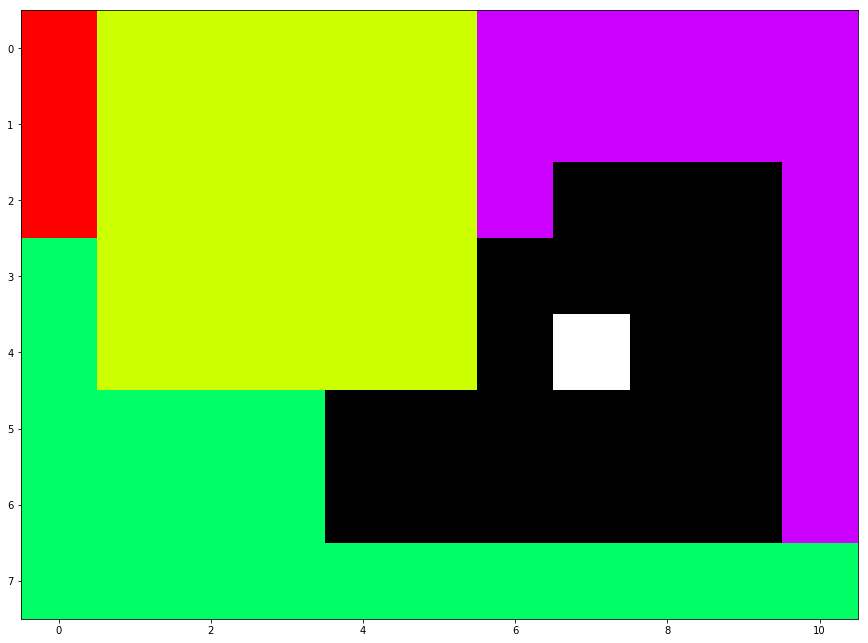

In [72]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import hsv_to_rgb

def highlight_superpixel(sp_map, msid):
#     plt.imshow(sp_map, cmap='gray')
#     plt.show()
    cp = sp_map.copy()
    cp[np.where(cp!=msid)] = -1
    cp[np.where(cp==msid)] = 200
    cp[np.where(cp==-1)] = 0
    cp = cp.astype(np.uint8)
    thresh = cv2.threshold(cp, 100, 255, cv2.THRESH_BINARY)[1]

    return thresh

def find_superpixel_center(sp_map, msid):
    """ Find the coordinate of superpixel center.
    """
    himg = highlight_superpixel(sp_map, msid)
    print(himg.shape)
    plt.imshow(himg, cmap='gray')
    plt.show()
    cnts = cv2.findContours(himg, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[1]
    main_cnt = cnts[0]
    for cnt in cnts:
        if len(cnt) > len(main_cnt):
            main_cnt = cnt
    main_cnt = np.array(main_cnt).reshape((-1,1,2)).astype(np.int32)
    M = cv2.moments(main_cnt)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    return ((cX, cY), main_cnt)

def visualize_map(sp_map, msid, center_coord, contours):
    H_MAX = 180
    h = sp_map.copy()
    s = np.full(sp_map.shape, 255)
    v = np.full(sp_map.shape, 255)
    numsp = np.max(h)

    # Mark the superpixel we are interested in.
    s[np.where(h==msid)] = -1
    v[np.where(h==msid)] = -1
    h[np.where(h==msid)] = -1

    # Set incremental color to all superpixels.
    for i in range(numsp+1):
        h[np.where(h==i)] = (i/(numsp+1)) * H_MAX
    
    # Darken the superpixel we are interested in.
    s[np.where(h==-1)] = 0
    v[np.where(h==-1)] = 0
    h[np.where(h==-1)] = 0

    # Whiten the center pixel coordinate.
    h[center_coord[1], center_coord[0]] = H_MAX
    s[center_coord[1], center_coord[0]] = 0
    v[center_coord[1], center_coord[0]] = 255
    
    cp = np.stack((h, s, v), axis=2).astype(np.uint8)
#     print(cp)
#     cp = np.concatenate((h, s, v), axis=1)
    cp = cv2.cvtColor(cp, cv2.COLOR_HSV2RGB)
        
    # Copy over the original image to separate variables
    img1 = cp.copy()

    # Draw both contours onto the separate images
#     cv2.drawContours(img1, contours, -1, (255,0,0), 3)
    plt.figure(figsize=(15,15))
    plt.imshow(img1)
    plt.show()
#     cp = hsv_to_rgb(cp)
        

# The image is 6x4 pixels.
# The center of superpixel 1 is at (2, 1).
# image = np.array([
#     [0, 1, 1, 1, 1, 1],
#     [0, 1, 1, 1, 1, 1],
#     [0, 1, 1, 1, 1, 1],
#     [2, 1, 1, 1, 1, 1],
#     [2, 1, 1, 1, 1, 1]
# ])

# center, contours = find_superpixel_center(image, 1)
# visualize_map(image, center, contours)

# image = np.array([
#     [0, 1, 1, 1, 4, 4, 4, 4, 4],
#     [0, 1, 1, 1, 1, 1, 4, 4, 4],
#     [0, 1, 1, 1, 1, 1, 4, 3, 3],
#     [2, 1, 1, 1, 1, 1, 3, 3, 3],
#     [2, 1, 1, 1, 3, 3, 3, 3, 3],
#     [2, 2, 2, 2, 3, 3, 3, 3, 3],
#     [2, 2, 2, 2, 3, 3, 3, 3, 3]
# ])

# center, contours = find_superpixel_center(image, 1)
# visualize_map(image, center, contours)

image = np.array([
    [0, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4],
    [0, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4],
    [0, 1, 1, 1, 1, 1, 4, 3, 3, 3, 4],
    [2, 1, 1, 1, 1, 1, 3, 3, 3, 3, 4],
    [2, 1, 1, 1, 1, 1, 3, 3, 3, 3, 4],
    [2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4],
    [2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4],
    [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
])

center, cnts = find_superpixel_center(image, 3)
print(center)
visualize_map(image, 3, center, cnts)

In [73]:
import sys
sys.path.append("../")
import superpixels as sp
from helpers import *
import imageio

sp.num_superpixels = 100
filename = '../data/toothpick.mp4'
vid = imageio.get_reader(filename, 'ffmpeg')

image = get_smaller_image(vid, 0)

sp_map = sp.extract_superpixels(image)

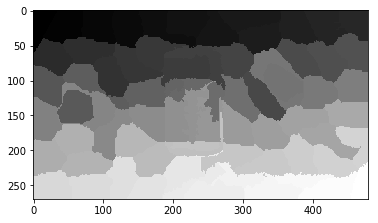

num of superpixels: 71


In [74]:
sp_map.shape
plt.imshow(sp_map, cmap="gray")
plt.show()
print("num of superpixels:", np.max(sp_map))

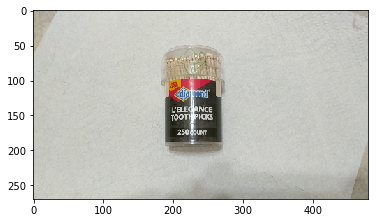

(270, 480)


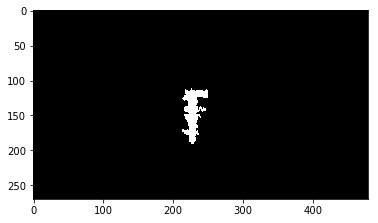

(229, 145)


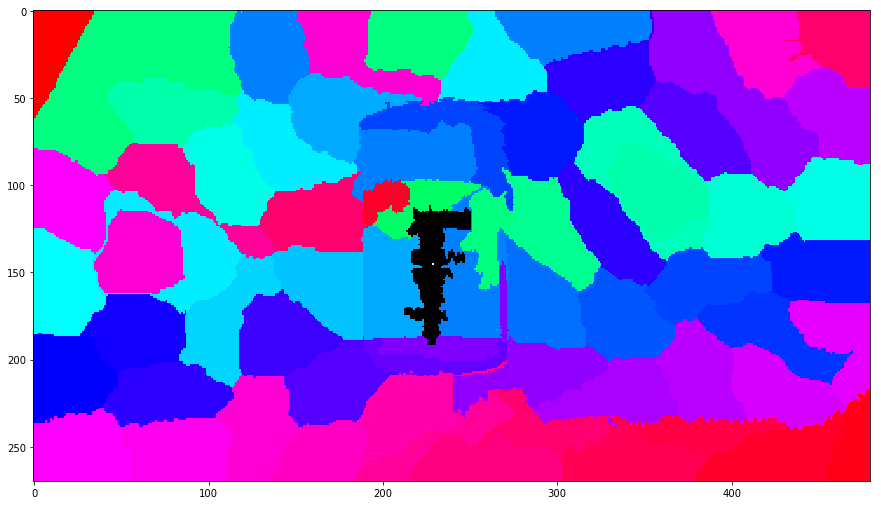

In [75]:
plt.imshow(image)
plt.show()

msid = 41
center, contours = find_superpixel_center(sp_map, msid)
print(center)
visualize_map(sp_map, msid, center, cnts)